In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

### Using Cross - Validation to find Optimal Value of k for kNN

In [2]:
# Breast Cancer Dataset is a classfication dataset therrefore the y i.e output values are binary
dataset = datasets.load_breast_cancer()
print(dataset.target)
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, random_state = 0)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [3]:
# This function plots the number of nearest neighbours (i.e k) vs the corresponding cross validation score
def plot_k_vs_crossvalscore(x_axis, y_axis):
    plt.figure(figsize=(20,10))
    plt.plot(x_axis, y_axis)
    plt.xlabel('k')
    plt.ylabel('Cross Validation Score')
    plt.show()

In [4]:
# Finds the cross validation score for different values of k and returns the value of k with the highest cross validation score
def get_maxscore_k(X_train, Y_train, max_k = 25):
    x_axis = []
    y_axis = []

    # going thorught different values of k from 1 to max_k
    for i in range(1, max_k + 1, 1):
        clf = KNeighborsClassifier(n_neighbors = i)
        score = cross_val_score(clf, X_train, Y_train)
        print(i, ':', score.mean())
        x_axis.append(i)
        y_axis.append(score.mean())
        
    plot_k_vs_crossvalscore(x_axis, y_axis)
    optimal_k = x_axis[y_axis.index(max(y_axis))]
    return optimal_k

1 : 0.9274863483211341
2 : 0.9165069129778086
3 : 0.9296648077146509
4 : 0.9274863483211341
5 : 0.9252788428023702
6 : 0.9296793307772743
7 : 0.9318723132334147
8 : 0.9362728012083189
9 : 0.9318868362960381
10 : 0.9318723132334147
11 : 0.9252788428023702
12 : 0.9296648077146509
13 : 0.9230858603462297
14 : 0.923056814220983
15 : 0.9120628558150344
16 : 0.9120773788776577
17 : 0.9120628558150344
18 : 0.909869873358894
19 : 0.9098553502962705
20 : 0.9164633437899384
21 : 0.9142703613337981
22 : 0.9164633437899384
23 : 0.916477866852562
24 : 0.9164633437899384
25 : 0.9098843964215174


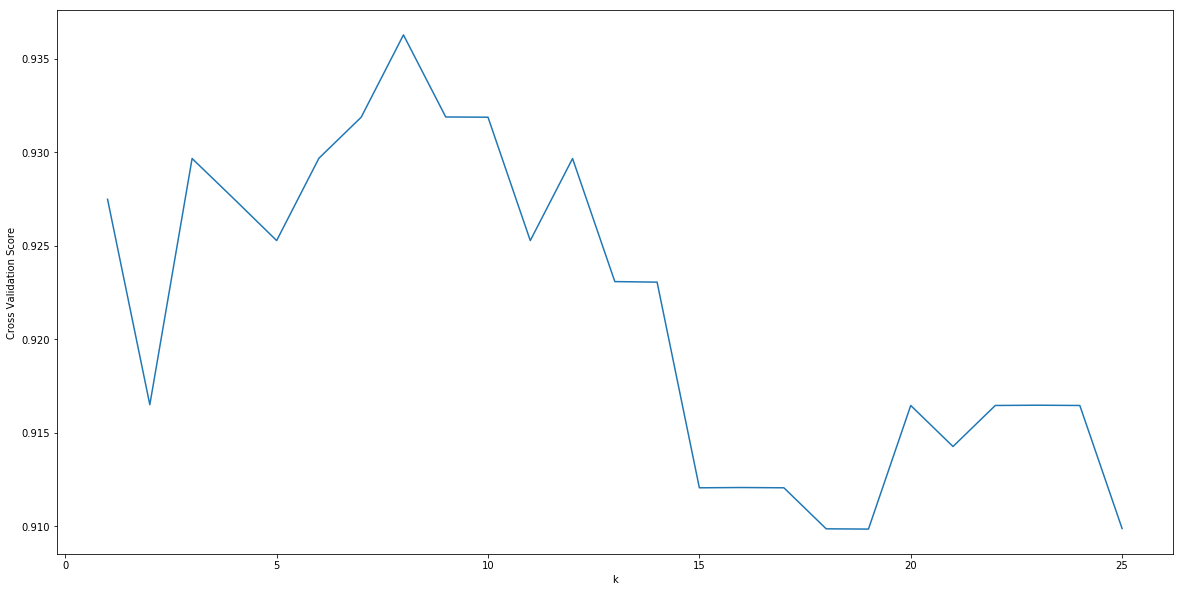

k with max cross-val score = 8


In [5]:
optimal_k = get_maxscore_k(X_train, Y_train, max_k = 25)
print('k with max cross-val score =', optimal_k)